## Comparación de threshold
### Autor: José Miguel Ramírez Sanz
#### Imports

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import timeit
import math
import os
import pandas as pd
import pickle as pk
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# import de utilities de detectron
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

#### Funciones

In [14]:
def comprobarThreshold(vd,th,nfr):
    vc = cv2.VideoCapture(vd)

    if (vc.isOpened()==False):
        print("Error")
    else:
        for i in range(nfr):
            ret,frame = vc.read()

    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = th
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
    predictor = DefaultPredictor(cfg)
    outputs = predictor(frame)
    v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v2 = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(18, 16))
    plt.imshow(imVisualizer)
    plt.title("Posición con " + str(th) + " de threshold.")
    plt.show()
    cv2.imwrite("PruebasModelos/pruebaCon"+ str(th) +".png", cv2.cvtColor(imVisualizer, cv2.COLOR_RGB2BGR))

In [15]:
vd = 'videos-prueba/Videos/Josemi/sentado2-cruzado.webm'
val = [0.3,0.5,0.75,0.99]

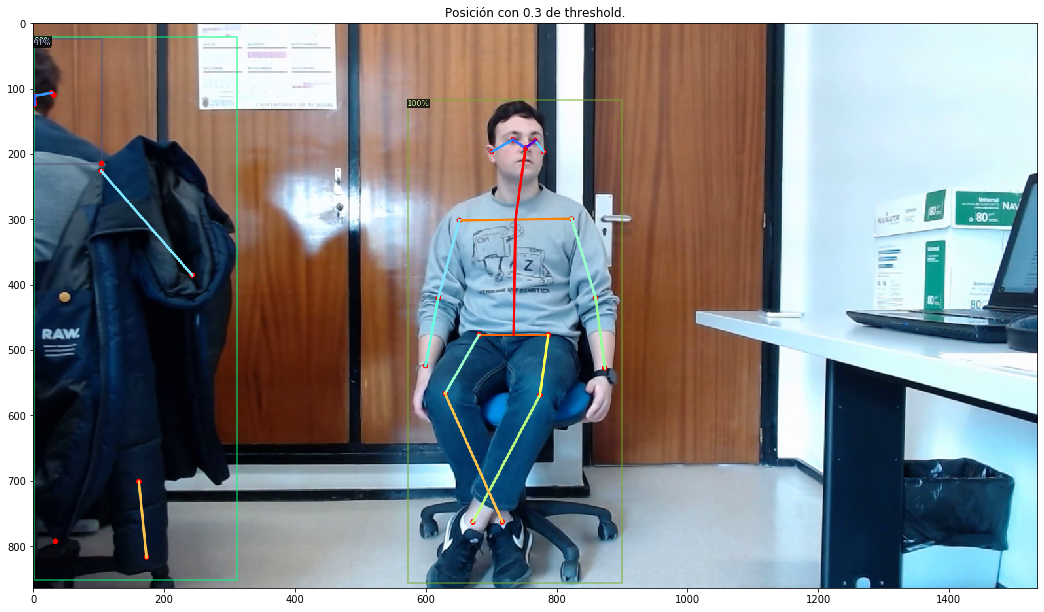

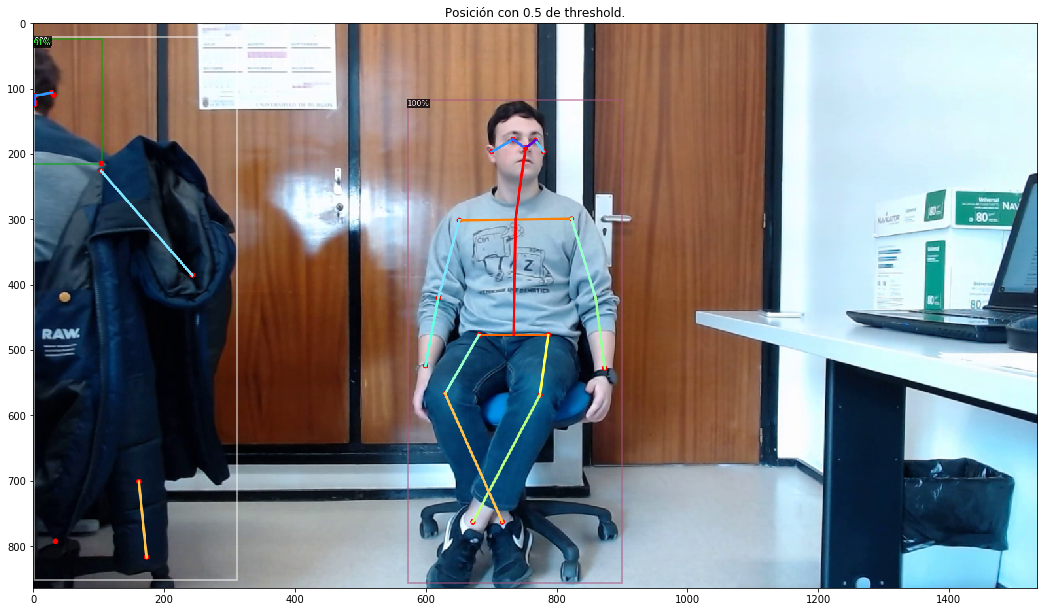

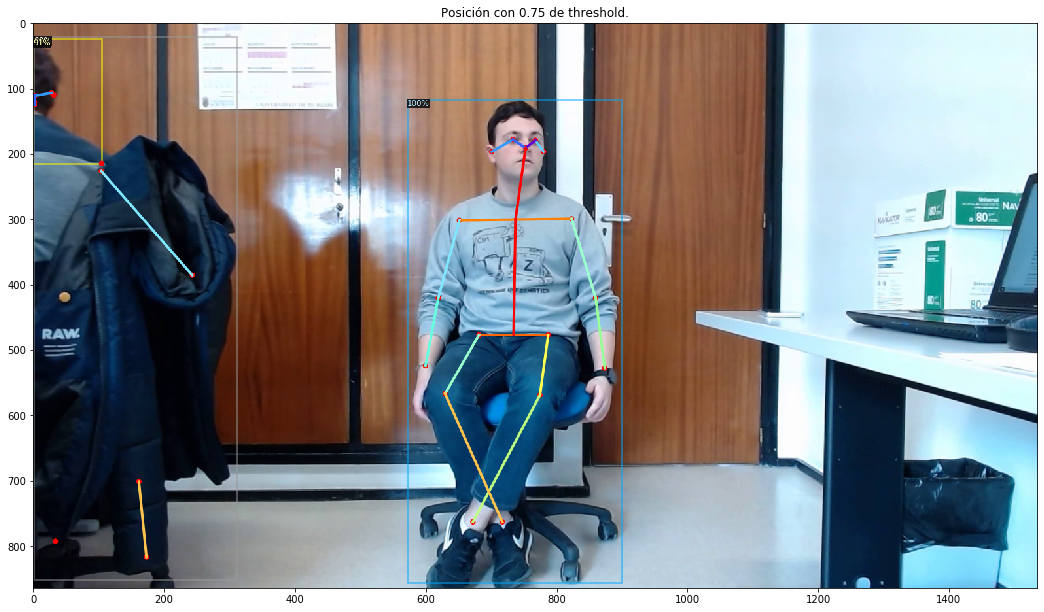

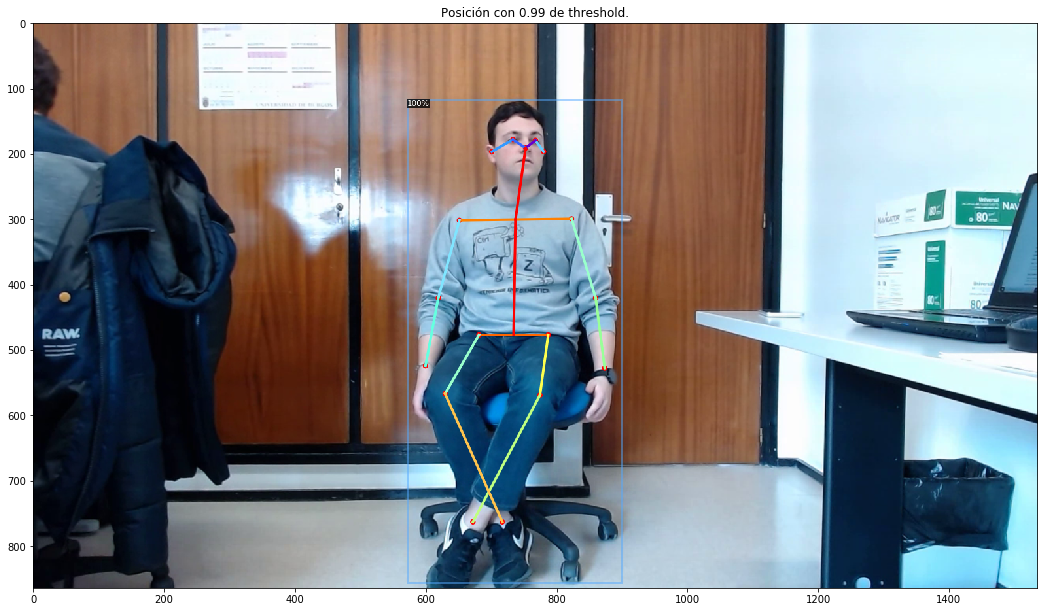

In [16]:
for v in val:
    comprobarThreshold(vd,v,10)